SecondGroupProject_ Group 9
Group Members

    Yusuf Brima
    Rashida Salih
    Japheth Kasomo
    Vincent Wayuga
    Jeannnette Mukangango



In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


In [3]:
A = quad(lambda x: (x**3 + 5*x -20)/(x**2 +3), 0, 2)[0]
print("A =", A)

B = quad(lambda x: (x - (1/3)) * np.sqrt(x**4 - 3), 3, 5)[0]
print("B =", B)

A = -7.049316535735796
B = 124.40877284192784


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [4]:
def f(z,t):
    x1,x2,x3 = z
    
    dx1dt =  -(1/2) * x1
    
    dx2dt = ((1/2) * x1) - (1/4 * (x2))
    
    dx3dt = (1/4 * (x2)) - (1/6 * (x3))
    
    return np.array([dx1dt,dx2dt,dx3dt])

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


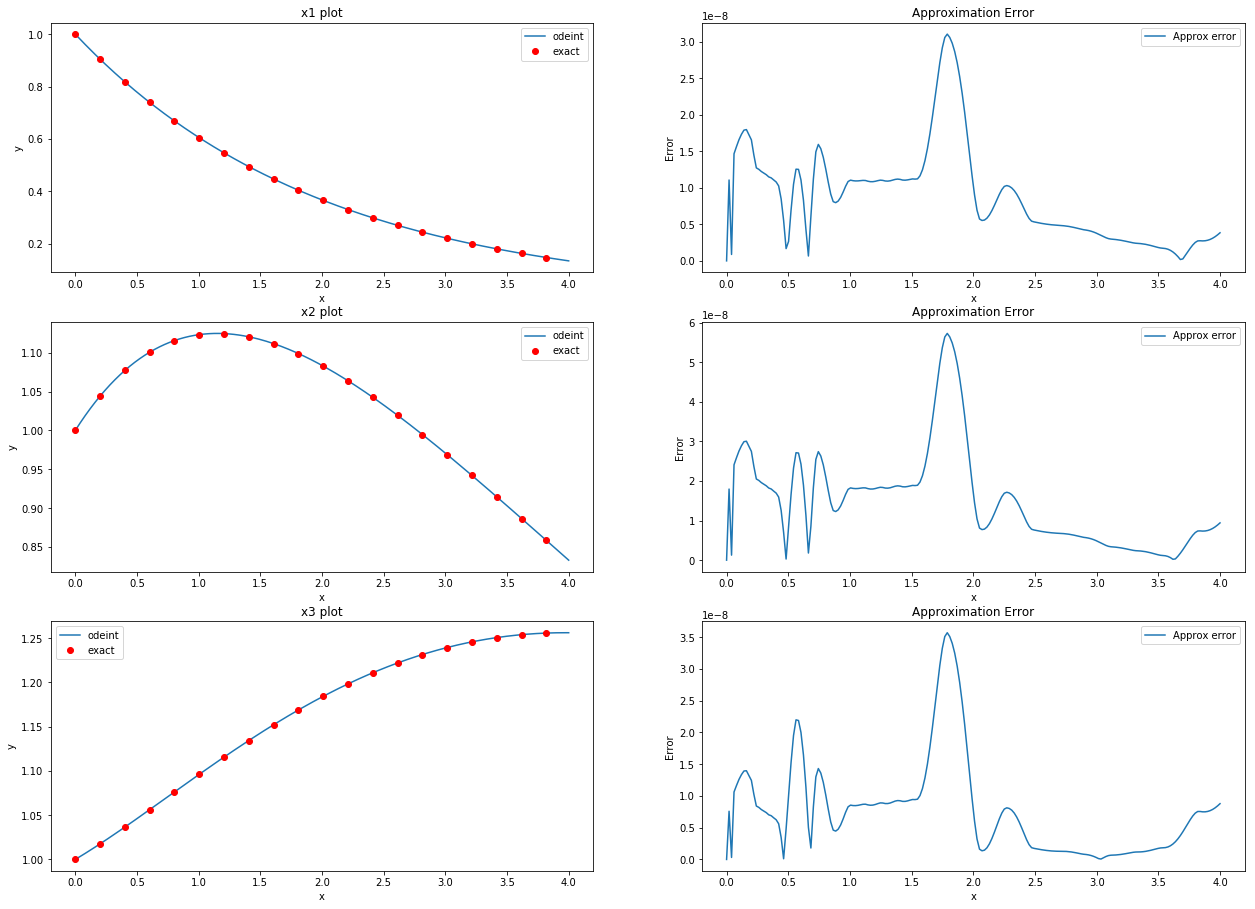

In [5]:
t =  np.linspace(0,4,200)

z0 = np.array([1,1,1])

z =  odeint(f,z0,t)


x1 = np.exp(-t/2)

x2 = -2* np.exp(-t/2) + (3* np.exp(-t/4))

x3 =  ((3/2)* np.exp(-t/2)) - (9*np.exp(-t/4)) + ((17/2) * np.exp(-t/6))

fig = plt.figure(1,figsize=(21.4,15.6))

plt.subplot(3,2,1)
plt.plot(t,z[:,0])
plt.plot(t[::10],x1[::10],"ro")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["odeint","exact"])
plt.title("x1 plot")

plt.subplot(3,2,2)
plt.plot(t,abs(z[:,0]- x1))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend(["Approx error"])
plt.title("Approximation Error")


plt.subplot(3,2,3)
plt.plot(t,z[:,1])
plt.plot(t[::10],x2[::10],'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["odeint","exact"])
plt.title("x2 plot")

plt.subplot(3,2,4)
plt.plot(t,abs(z[:,1]- x2))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend(["Approx error"])
plt.title("Approximation Error")

plt.subplot(3,2,5)
plt.plot(t,z[:,2])
plt.plot(t[::10],x3[::10],'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["odeint","exact"])
plt.title("x3 plot")

plt.subplot(3,2,6)
plt.plot(t,abs(z[:,2]- x3))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend(["Approx error"])
plt.title("Approximation Error")

plt.show()

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [6]:
def EulerOdeSys(f,c,t):
    
    H = t[1] - t[0]
    
    N = len(t)
    M  = len(c)
    
    z = np.zeros((N,M))
    z[0] = c
    
    for k in range(0,N-1):
        z[k+1] =  z[k] + (H * f(z[k],t[k]))
    return z

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [7]:
def RK4OdeSys(f,c,t):
    
    H = t[1] - t[0]
    
    N = len(t)
    M  = len(c)
    
    z = np.zeros((N,M))
    z[0] = c
    
    
    for k in range(0,N-1):
        k1 = f(z[k],t[k])
        
        k2 = f(z[k]+ ((H) * (k1/2)), t[k] + (H/2) )
        
        k3 = f(z[k]+ (H * (k2/2)), t[k] + (H/2) )
        
        k4 = f(z[k]+ (H * k3) , t[k] + H )
        
        z[k+1] =  z[k] + ((H/6) * (k1 + 2*k2 + 2*k3 + k4) )
    return z

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [8]:
RK4=RK4OdeSys(f,z0,t)
Euler=EulerOdeSys(f,z0,t)


4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

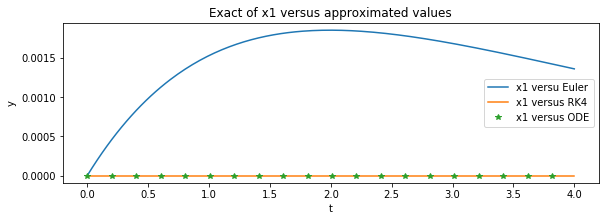

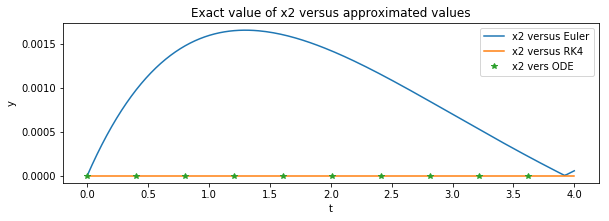

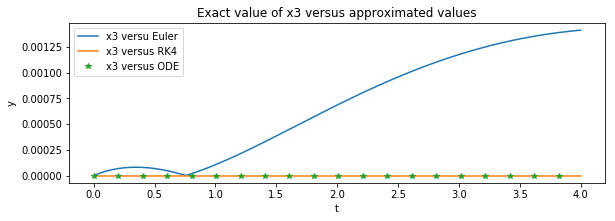

In [9]:
plt.figure(1,figsize=(9.6,10))
plt.subplot(3,1,1)
plt.plot(t,abs(x1-Euler[:,0]))
plt.plot(t,abs(x1-RK4[:,0]))
plt.plot(t[::10],abs(x1-z[:,0])[::10],"*")
plt.legend(["x1 versu Euler","x1 versus RK4","x1 versus ODE"])
plt.xlabel("t")
plt.ylabel("y")
plt.title("Exact of x1 versus approximated values")
plt.show()

plt.figure(1,figsize=(9.6,10))
plt.subplot(3,1,2)
plt.plot(t,abs(x2-Euler[:,1]))
plt.plot(t,abs(x2-RK4[:,1]))
plt.plot(t[::20],abs(x2-z[:,1])[::20],"*")
plt.legend(["x2 versus Euler","x2 versus RK4","x2 vers ODE"])
plt.xlabel("t")
plt.ylabel("y")
plt.title("Exact value of x2 versus approximated values")
plt.show()

plt.figure(1,figsize=(9.6,10))
plt.subplot(3,1,3)
plt.plot(t,abs(x3-Euler[:,2]))
plt.plot(t,abs(x3-RK4[:,2]))
plt.plot(t[::10],abs(x3-z[:,2])[::10],"*")
plt.legend(["x3 versu Euler","x3 versus RK4","x3 versus ODE"])
plt.xlabel("t")
plt.ylabel("y")
plt.title("Exact value of x3 versus approximated values")

plt.show()

#from graphs below Runge Kutta method of approximation gives us a more accurate solution of a system of ODEs.

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [10]:


def MatGenerator(a,b,K,aplha,beta,N,g):
    H = (b -a)/N
    
    x = np.linspace(a,b,N+1)
    b = np.zeros(N+1)
    b = g(x)
    b[0] = alpha
    b[-1] = beta
    A =  np.zeros((N+1,N+1))
    A[0,0] = H**2/K
    A[N,N] = H**2/K
    for i in range(1,N):
        A[i,i-1] = -1
        A[i,i] = 2
        A[i,i+1] = -1
    return (A * (K/H**2)),b
    
    

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

In [11]:
a = 0
b = 1
K = 1
alpha = -4
beta= 0
N = 100
g = lambda x: -4*(1 + x)*np.exp(x)
A,B = MatGenerator(a,b,K,alpha,beta,N,g)

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

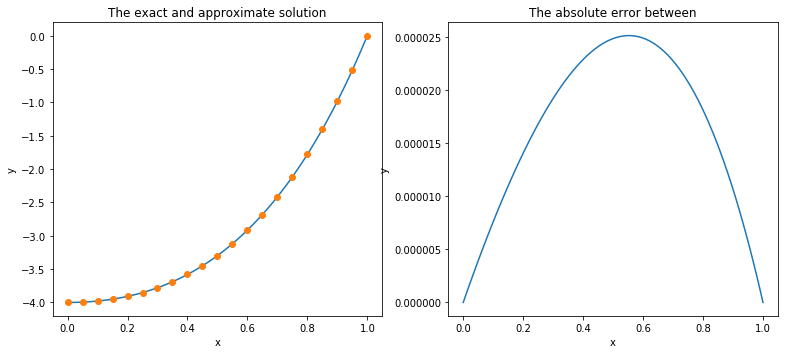

In [12]:
U_approx = np.linalg.inv(A)@B
x = np.linspace(a,b,N+1)
F_U= lambda x: 4*(x-1)*np.exp(x)
U_exact = F_U(x)

fig = plt.figure(1, figsize=(13,5.4))
plt.subplot(1,2,1)
plt.plot(x,U_exact)
plt.plot(x[::5],U_approx[::5],'o')
plt.title('The exact and approximate solution')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.plot(x,abs(U_exact - U_approx))
plt.title('The absolute error between')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
